## Grundlegende Pandas-Beispiele

Dieses Notebook führt Sie durch einige grundlegende Pandas-Konzepte. Wir beginnen mit dem Import typischer Data-Science-Bibliotheken:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serien

Serien sind wie eine Liste oder ein eindimensionales Array, jedoch mit Index. Alle Operationen sind indexbasiert.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Eine der häufigsten Anwendungen von Serien ist **Zeitreihen**. In Zeitreihen hat der Index eine besondere Struktur – typischerweise einen Bereich von Daten oder Zeitstempeln. Wir können einen solchen Index mit `pd.date_range` erstellen.

Angenommen, wir haben eine Serie, die die Menge des täglich gekauften Produkts zeigt, und wir wissen, dass wir jeden Sonntag auch einen Artikel für uns selbst benötigen. So kann man das mit Serien modellieren:


Length of index is 366


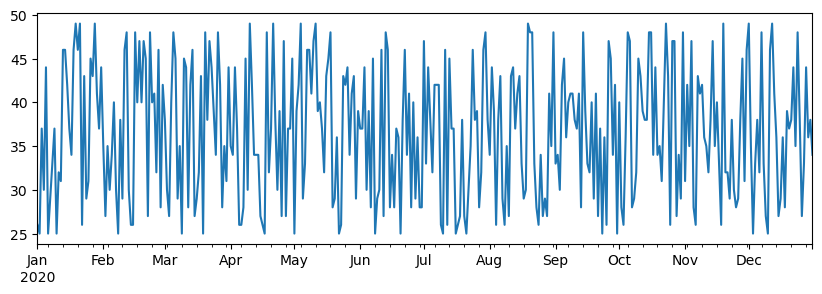

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Wie Sie sehen können, haben wir hier Probleme, da in der wöchentlichen Serie nicht erwähnte Tage als fehlend (`NaN`) betrachtet werden, und das Hinzufügen von `NaN` zu einer Zahl ergibt `NaN`. Um das korrekte Ergebnis zu erhalten, müssen wir `fill_value` angeben, wenn wir Serien hinzufügen:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


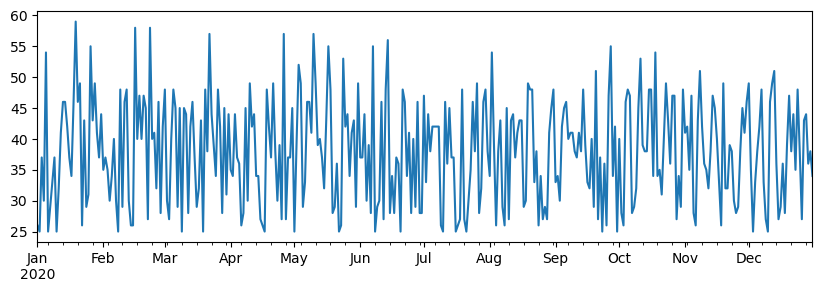

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

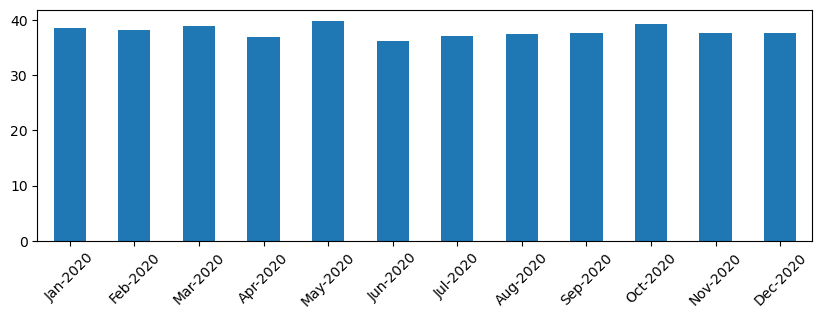

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Ein DataFrame ist im Wesentlichen eine Sammlung von Serien mit demselben Index. Wir können mehrere Serien zu einem DataFrame zusammenfügen. Angenommen, die Serien `a` und `b` sind wie oben definiert:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Wir können auch Series als Spalten verwenden und die Spaltennamen mit einem Wörterbuch angeben:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Das gleiche Ergebnis kann durch Transponieren (und anschließend Umbenennen der Spalten, um dem vorherigen Beispiel zu entsprechen) erzielt werden:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Auswählen von Spalten** aus dem DataFrame kann so durchgeführt werden:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Auswahl von Zeilen** basierend auf Filterausdruck:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Der Ausdruck `df['A']<5` gibt eine boolesche Serie zurück, die angibt, ob der Ausdruck für jedes Element der Serie `True` oder `False` ist. Wenn die Serie als Index verwendet wird, gibt sie eine Teilmenge der Zeilen im DataFrame zurück. Daher ist es nicht möglich, beliebige Python-Boolesche Ausdrücke zu verwenden. Zum Beispiel wäre das Schreiben von `df[df['A']>5 and df['A']<7]` falsch. Stattdessen sollte man die spezielle `&`-Operation auf booleschen Serien verwenden:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Erstellen neuer berechenbarer Spalten**. Wir können leicht neue berechenbare Spalten für unser DataFrame erstellen, indem wir intuitive Ausdrücke verwenden. Der untenstehende Code berechnet die Abweichung von A von seinem Mittelwert.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Was tatsächlich passiert, ist, dass wir eine Serie berechnen und diese Serie dann der linken Seite zuweisen, wodurch eine weitere Spalte erstellt wird.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Auswählen von Zeilen basierend auf Zahlen** kann mit dem `iloc`-Konstrukt durchgeführt werden. Zum Beispiel, um die ersten 5 Zeilen aus dem DataFrame auszuwählen:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruppierung** wird oft verwendet, um ein Ergebnis ähnlich wie *Pivot-Tabellen* in Excel zu erhalten. Angenommen, wir möchten den Mittelwert der Spalte `A` für jede gegebene Zahl von `LenB` berechnen. Dann können wir unser DataFrame nach `LenB` gruppieren und `mean` aufrufen:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Wenn wir den Mittelwert und die Anzahl der Elemente in der Gruppe berechnen müssen, können wir die komplexere `aggregate`-Funktion verwenden:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Drucken und Plotten

Ein Data Scientist muss Daten häufig erkunden, daher ist es wichtig, sie visualisieren zu können. Wenn ein DataFrame groß ist, möchten wir oft nur sicherstellen, dass wir alles richtig machen, indem wir die ersten paar Zeilen ausgeben. Dies kann durch Aufrufen von `df.head()` erfolgen. Wenn Sie dies in einem Jupyter Notebook ausführen, wird der DataFrame in einer übersichtlichen tabellarischen Form angezeigt.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Wir haben auch die Verwendung der `plot`-Funktion gesehen, um einige Spalten zu visualisieren. Während `plot` für viele Aufgaben sehr nützlich ist und viele verschiedene Diagrammtypen über den `kind=`-Parameter unterstützt, können Sie immer die rohe `matplotlib`-Bibliothek verwenden, um etwas Komplexeres zu erstellen. Wir werden die Datenvisualisierung ausführlich in separaten Kurslektionen behandeln.


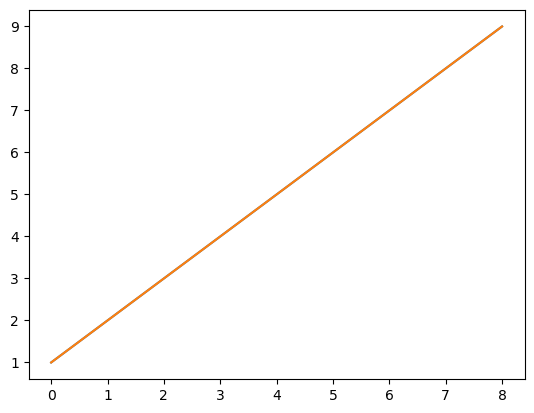

In [61]:
df['A'].plot()
plt.show()

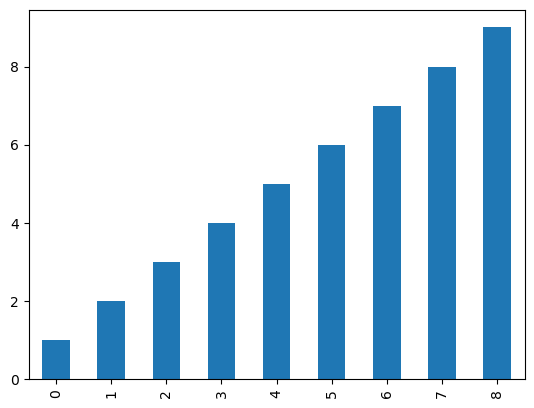

In [63]:
df['A'].plot(kind='bar')
plt.show()

Diese Übersicht behandelt die wichtigsten Konzepte von Pandas, jedoch ist die Bibliothek sehr umfangreich und es gibt keine Grenzen dafür, was man damit machen kann! Wenden wir dieses Wissen nun an, um ein spezifisches Problem zu lösen.



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, beachten Sie bitte, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
